Practica 0 AAyBD
Realizada por Daniela Vidal y Jorge Ortega

In [9]:
import numpy as np
import scipy


In [92]:
def integra_mc_fast(fun, a, b, num_puntos=10000):
    x = np.random.uniform(a, b, num_puntos)
    fs = fun(x)

    max_y = np.amax(fs)
    y2 = np.random.uniform(0, max_y, num_puntos)

    dentro = np.sum(y2 < fs)

    return (b-a)*(dentro/num_puntos)*max_y



In [85]:
def integra_mc(fun, a, b, num_puntos=10000):
    x = np.random.uniform(a, b, num_puntos)
    fs = fun(x)

    max_y = max(fs)
    y2 = np.random.uniform(0, max_y, num_puntos)

    dentro = 0
    for i in range(num_puntos):
        if y2[i] < fs[i]:
            dentro += 1

    return (b-a)*(dentro/num_puntos)*max_y

In [81]:
f = lambda x: x**2 + x +3

print(integra_mc(f, 0, 10))
print(integra_mc_fast(f, 0, 10))

scipy.integrate.quad(f,0,10)



416.3014421087252
410.8394104895538


(413.33333333333337, 4.588921835117314e-12)

In [1]:
import matplotlib.pyplot as plt
import time

def compara_tiempos_int(f, a, b):
    sizes = np.linspace(100, 10000000, 20)
    times_int = []
    times_fast_int = []
    for size in sizes:
        tic = time.process_time()
        inte = integra_mc(f, a, b, int(size))
        toc = time.process_time()
        times_int += [1000 * (toc - tic)]
        
        tic = time.process_time()
        fast_int = integra_mc_fast(f, a, b, int(size))
        toc = time.process_time()
        times_fast_int += [1000 * (toc - tic)]

    plt.figure()
    plt.scatter(sizes, times_int, c='red', label='bucle')
    plt.scatter(sizes, times_fast_int, c='blue', label='vector')
    plt.legend()
    plt.savefig('compara tiempos int.png')

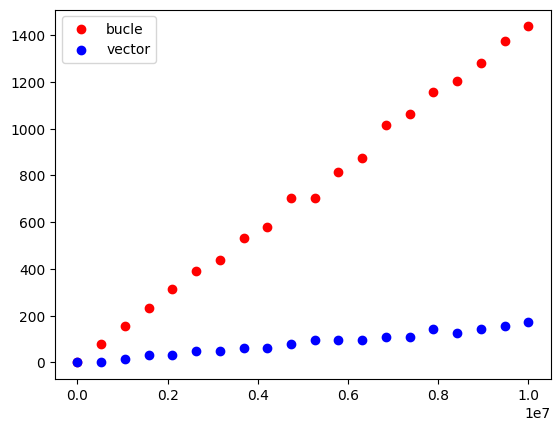

In [94]:
f = lambda x: x**2 + x +3

compara_tiempos_int(f, 0, 10)